In [1]:
sisters = {}
with open('sisters_latlng.txt') as f:
    for line in f:
        k, v = line.strip().split(':')
        sisters[k] = v.split('|')

print('sisters has %d entries' % len(sisters.keys()))
print(sisters)

sisters has 322 entries
{'35.97738888888889,139.59319444444446': ['-27.558833333333332,152.2781666666667'], '43.55,142.05': ['36.30277777777778,136.3150277777778', '37.45,129.165', '29.35638888888889,113.12888888888888'], '34.65,135.0': ['38.113055555555555,-122.23583333333333', '31.491111111111113,120.31194444444444'], '39.72002777777778,140.1025833333333': ['36.53827777777778,140.53091666666668', '36.06055555555555,103.82666666666667', '48.56666666666667,13.466666666666667', '45.55,-94.16666666666667', '43.13333333333333,131.9'], '43.05,144.85': ['-42.842222222222226,147.43861111111113'], '34.733333333333334,135.4': ['48.36666666666667,10.9'], '34.95872222222223,137.08033333333333': ['-37.85,144.83333333333334', '33.69277777777778,-118.00027777777778', '55.483333333333334,9.466666666666667'], '40.82233333333334,140.73072222222223': ['24.816666666666666,120.98333333333333', '46.9075,19.691666666666666', '36.992222222222225,127.11277777777777'], '34.05,135.21666666666667': ['28.2925,11

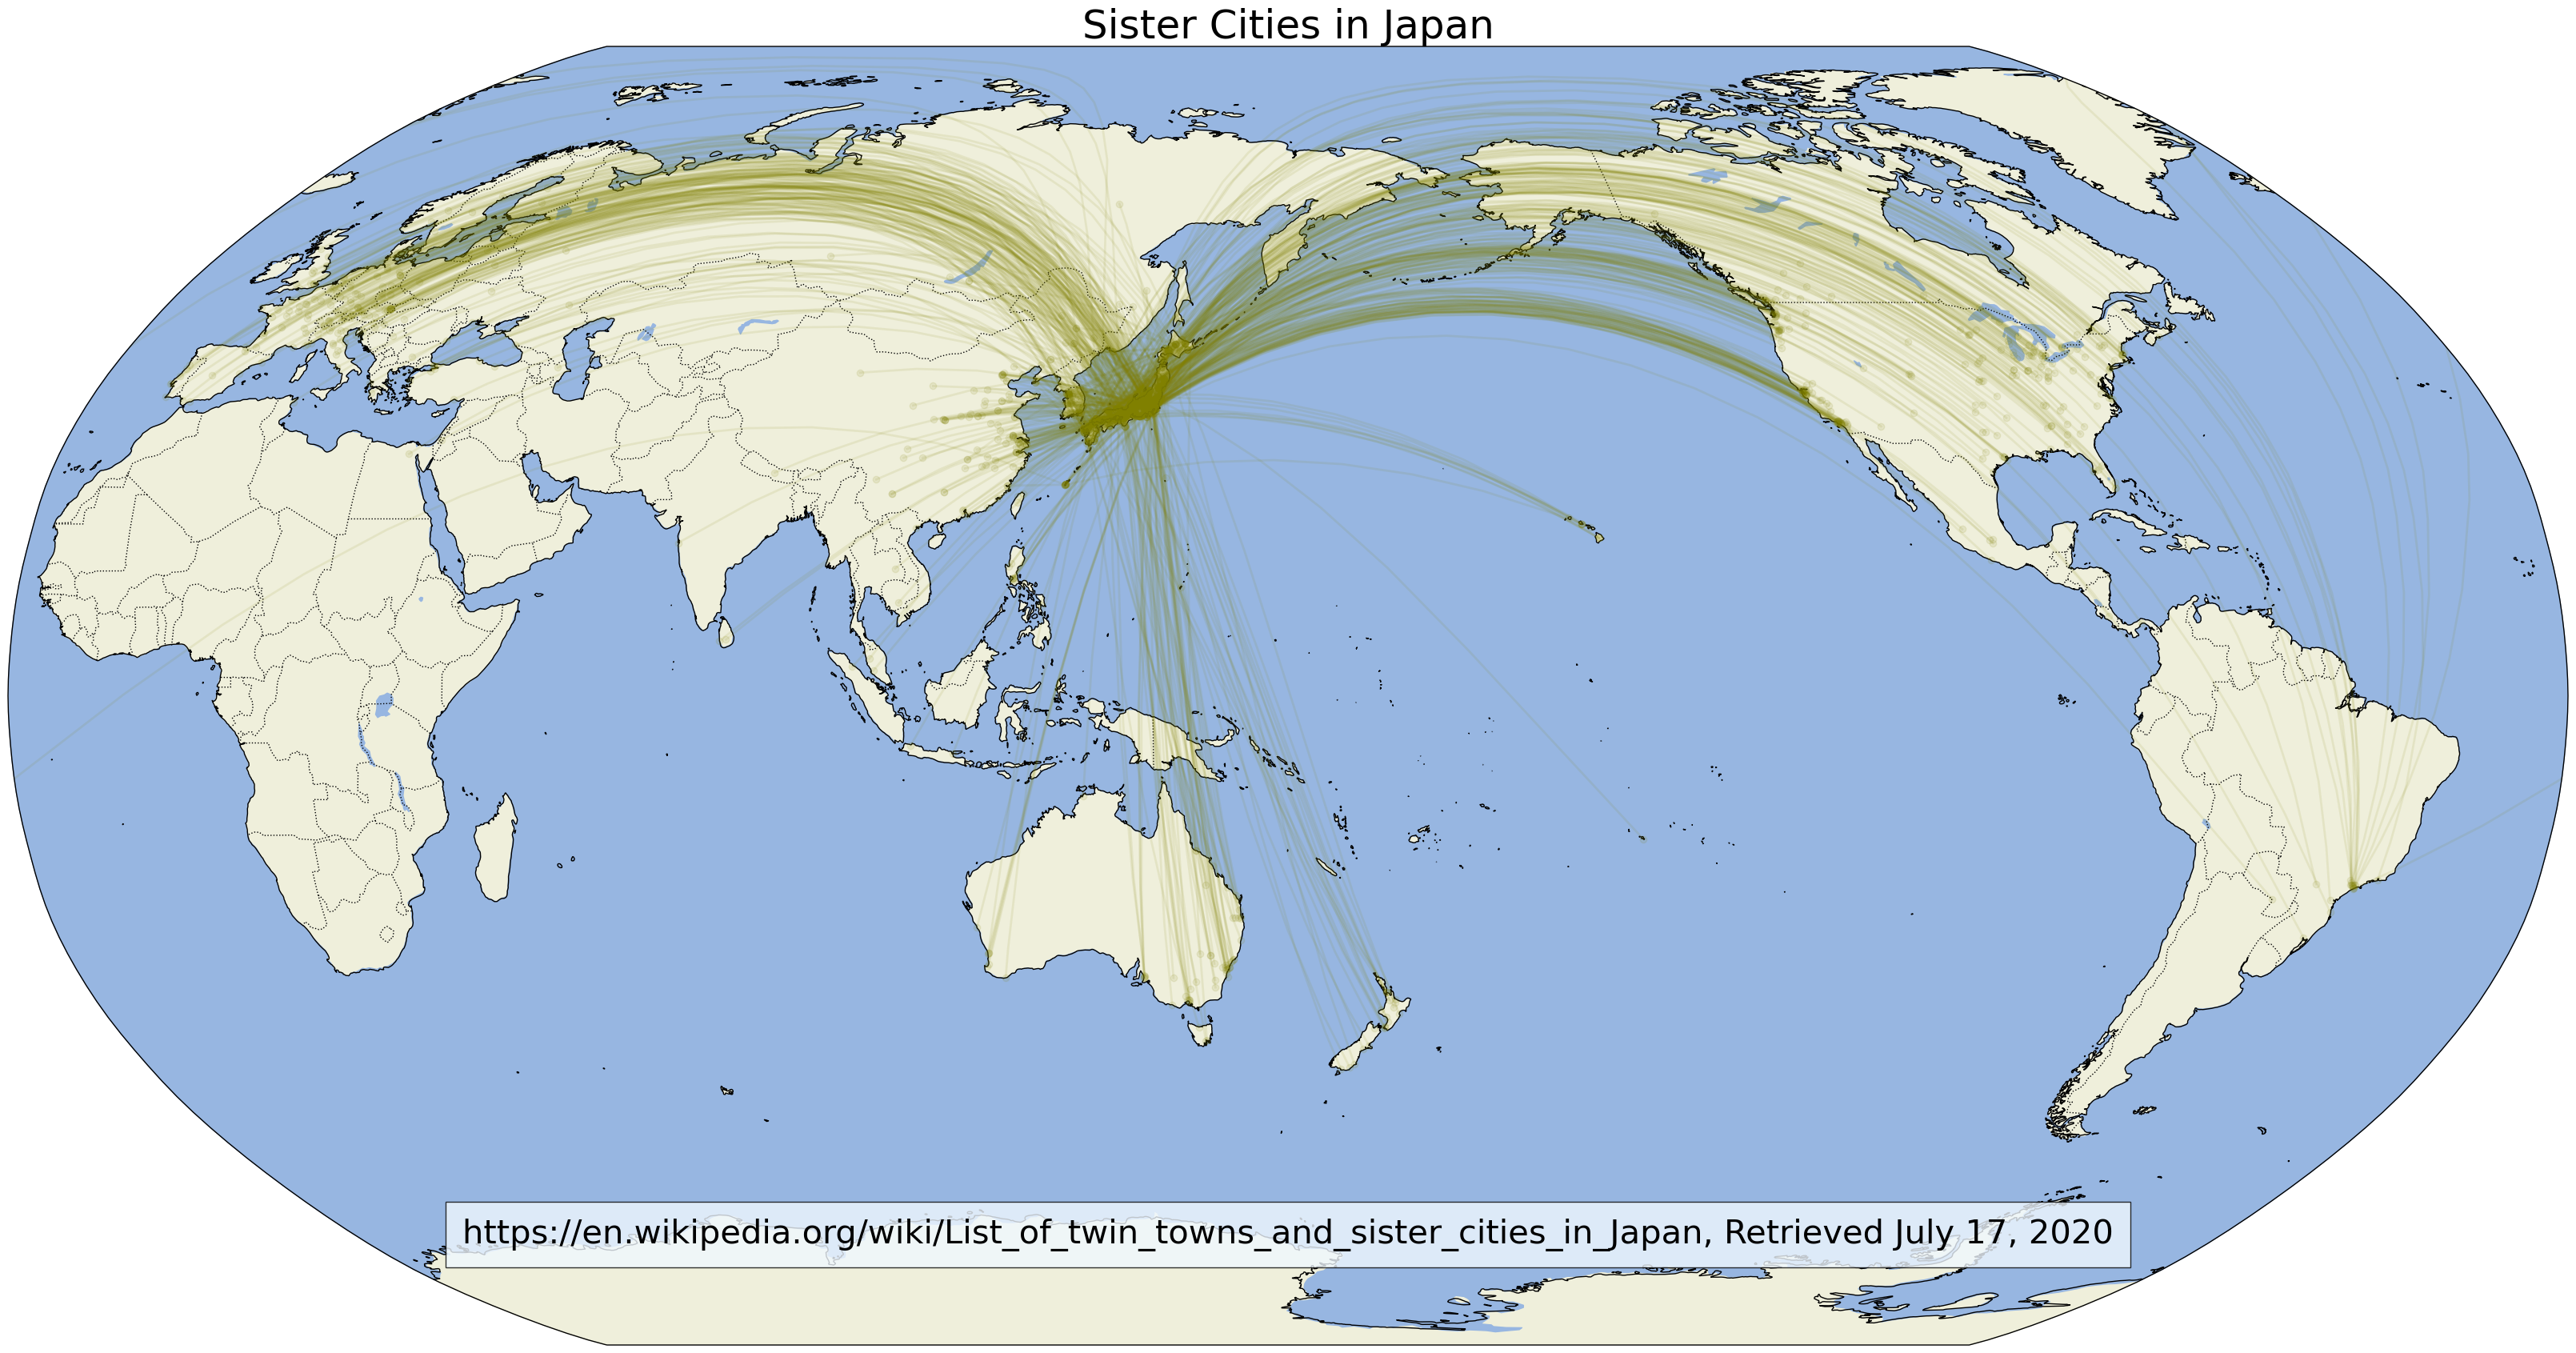

In [2]:
import matplotlib.pyplot as plt
import cartopy

fig = plt.figure(dpi=100, figsize=(32.0, 18.0))
ax = plt.axes(projection=cartopy.crs.Robinson(central_longitude=160))

ax.set_global()
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#ax.stock_img()

for k, v in sisters.items():
    jp = [float(p) for p in k.split(',')]
    for sister in v:
        sp = [float(p) for p in sister.split(',')]
        plt.plot([jp[1], sp[1]], [jp[0], sp[0]], 
                 color='olive', alpha=.1, linewidth=2, marker='o',
                 transform=cartopy.crs.Geodetic())

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.title('Sister Cities in Japan', fontsize=36)
plt.figtext(0.5, 0.12, 
            "https://en.wikipedia.org/wiki/List_of_twin_towns_and_sister_cities_in_Japan, Retrieved July 17, 2020", 
            ha="center", fontsize=30, bbox={"facecolor":"aliceblue", "alpha":0.8, "pad":15})
plt.savefig('sistercities.png')
plt.show()